In [2]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes = True)

In [3]:
df = pd.read_csv('home_data.csv')


In [4]:
data = df.drop(['id','date'], axis = 1)

# Create a simple regression model of sqft_living to price

In [5]:
from sklearn import linear_model
from sklearn import metrics

### split the data

In [6]:
from sklearn.model_selection import train_test_split
x = data['sqft_living']
x = x.values.reshape(-1,1)
y = data['price']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2) 

In [7]:
from sklearn.linear_model import LinearRegression
##Train the model
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
predictions = regr.predict(x_test)

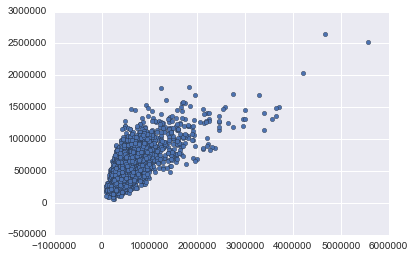

In [9]:
plt.scatter(y_test, predictions)

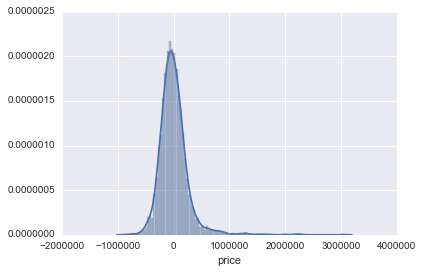

In [10]:
sns.distplot((y_test-predictions),bins=100)

## Evaluate the model

In [11]:
print('Y Intercept: ', regr.intercept_)
print("")
print('Coefficients: ', regr.coef_)

Y Intercept:  -40091.0467583

Coefficients:  [ 278.66674984]


In [12]:
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('STD: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance: ', metrics.explained_variance_score(y_test, predictions))
print('Midean Absolute Error: ', metrics.median_absolute_error(y_test, predictions))
print('r^2: ', metrics.r2_score(y_test, predictions))

MSE:  69154881380.1
MAE:  174867.977718
STD:  262973.157147
Explained Variance:  0.494275882632
Midean Absolute Error:  128969.068027
r^2:  0.494214323536


In [13]:
print(predictions.mean())
print(y_test.mean())

538016.05031
540917.2276197085


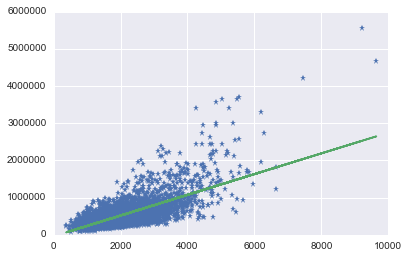

In [14]:
plt.plot(x_test,y_test, '*',
         x_test,predictions,'-')

# Create a multiple linear regression model

In [15]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
data[features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


In [1]:
#sns.pairplot(data[features])

In [17]:
x2 = data[features]
y2 = data['price']
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2, test_size = 0.2)

In [18]:
regr.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

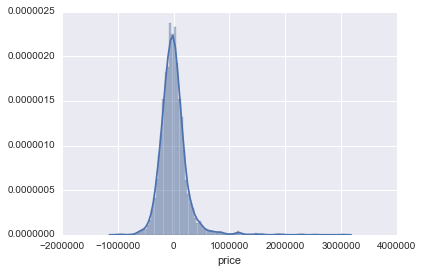

In [19]:
predictions2 = regr.predict(x2_test)
sns.distplot((y2_test - predictions2), bins = 100)

## Evaluate the model

In [20]:
print('MSE: ', metrics.mean_squared_error(y2_test, predictions2))
print('MAE: ', metrics.mean_absolute_error(y2_test, predictions2))
print('STD: ', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))
print('Explained Variance: ', metrics.explained_variance_score(y2_test, predictions2))
print('Midean Absolute Error: ', metrics.median_absolute_error(y2_test, predictions2))
print('r^2: ', metrics.r2_score(y2_test, predictions2))

MSE:  61808880543.0
MAE:  164675.097792
STD:  248613.918643
Explained Variance:  0.525698507093
Midean Absolute Error:  121313.687017
r^2:  0.525644534364


In [21]:
print('Y Intercept: ', regr.intercept_)
print("")
print('Coefficients: ', regr.coef_)

Y Intercept:  -54464275.2275

Coefficients:  [ -5.68014978e+04   1.37756971e+04   3.15358107e+02  -3.09325886e-01
  -6.62823196e+03   5.55944536e+02]


In [22]:
print('Model_1 r2: ', metrics.r2_score(y_test,predictions))
print('Model_2 r2: ', metrics.r2_score(y2_test,predictions2))

Model_1 r2:  0.494214323536
Model_2 r2:  0.525644534364
